# Détection d'Anomalies dans les Salaires

## Objectif
Identifier les entreprises avec des comportements salariaux anormaux (fraude, erreurs, inégalités)

**Algorithme** : Isolation Forest  
**Dataset** : dataset_ml_anomalies.csv (17 261 entreprises)

## 1. Import des Bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 2. Chargement des Données

In [2]:
# Charger le dataset
df = pd.read_csv('dataset_ml_anomalies.csv')

print(f"Dataset chargé : {df.shape}")
print(f"Colonnes : {len(df.columns)}")
print(f"\nPremières lignes :")
df.head()

Dataset chargé : (17259, 16)
Colonnes : 16

Premières lignes :


,affiliateNumber,directionRegionale,anciennete_adhesion_months,nb_salaries,masse_salariale_totale,salaire_moyen,salaire_median,salaire_max,salaire_min,salaire_std,total_jours_travailles,taux_salaries_actifs,salaire_par_jour,jours_par_salarie,ecart_salaire_region,compte_a_risque
0,1905845,6,277,243.0,2243500.08,9232.510617,8009.44,26144.61,5700.89,3067.772002,6288.0,100.0,356.790725,25.876543,3869.918482,1
1,1928079,0,277,169.0,2247296.10,13297.610059,6905.54,249174.07,1432.67,24666.136076,4242.0,100.0,529.772772,25.100592,5514.771034,1
2,1929415,14,276,14.0,171668.17,12262.012143,10233.95,24200.00,6332.07,5678.345705,364.0,100.0,471.615852,26.000000,5265.378504,1
3,1839466,14,276,19.0,78389.88,4125.783158,3949.52,5696.63,3163.35,693.807403,493.0,100.0,159.005842,25.947368,-2870.850481,1
4,2062404,6,276,2.0,16462.44,8231.220000,8231.22,9844.35,6618.09,2281.310324,45.0,100.0,365.832000,22.500000,2868.627864,1


## 3. Sélection des Features pour le ML

In [3]:
# Sélectionner uniquement les features numériques importantes
features_ml = [
    'nb_salaries',
    'masse_salariale_totale',
    'salaire_moyen',
    'salaire_median',
    'salaire_max',
    'salaire_min',
    'salaire_std',
    'total_jours_travailles',
    'taux_salaries_actifs',
    'salaire_par_jour',
    'jours_par_salarie',
    'ecart_salaire_region',
    'compte_a_risque'
]

X = df[features_ml].copy()

print(f"Features sélectionnées : {len(features_ml)}")
print(f"Shape X : {X.shape}")
print(f"\nValeurs manquantes :")
print(X.isnull().sum())
print(f"\nStatistiques :")
X.describe()

Features sélectionnées : 13
Shape X : (17259, 13)

Valeurs manquantes :
nb_salaries               0
masse_salariale_totale    0
salaire_moyen             0
salaire_median            0
salaire_max               0
salaire_min               0
salaire_std               0
total_jours_travailles    0
taux_salaries_actifs      0
salaire_par_jour          0
jours_par_salarie         0
ecart_salaire_region      0
compte_a_risque           0
dtype: int64

Statistiques :


,nb_salaries,masse_salariale_totale,salaire_moyen,salaire_median,salaire_max,salaire_min,salaire_std,total_jours_travailles,taux_salaries_actifs,salaire_par_jour,jours_par_salarie,ecart_salaire_region,compte_a_risque
count,17259.000000,1.725900e+04,17259.000000,17259.000000,1.725900e+04,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000,1.725900e+04,17259.000000
mean,9.629179,4.373159e+04,5166.588712,4951.455775,7.690065e+03,4014.459630,1266.010491,213.067153,97.954483,216.941508,22.927046,-2.698078e-14,0.997509
std,82.151700,3.214582e+05,8085.984040,7238.254860,2.176502e+04,6017.267096,6974.287983,1790.454938,12.268767,314.976012,5.240214,7.950837e+03,0.049854
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.782839e+03,0.000000
25%,1.000000,3.207705e+03,2878.710000,2969.960000,3.000000e+03,2047.050000,0.000000,26.000000,100.000000,119.948583,21.875000,-2.392497e+03,1.000000
50%,1.000000,6.090550e+03,3389.900000,3290.740000,4.000000e+03,2975.000000,0.000000,26.000000,100.000000,142.940385,26.000000,-1.088580e+03,1.000000
75%,3.000000,1.575761e+04,5075.277500,4852.550000,6.754180e+03,4168.595000,1107.269136,78.000000,100.000000,207.923462,26.000000,2.185360e+02,1.000000
max,5247.000000,1.786318e+07,373305.453333,341884.120000,1.247742e+06,341884.120000,486332.945173,117087.000000,100.000000,14357.902051,26.000000,3.677019e+05,1.000000


## 4. Préparation et Normalisation

In [4]:
# Remplacer les valeurs infinies et NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

# Normalisation (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✓ Données normalisées : {X_scaled.shape}")
print(f"Moyenne : {X_scaled.mean():.4f}")
print(f"Écart-type : {X_scaled.std():.4f}")

✓ Données normalisées : (17259, 13)
Moyenne : 0.0000
Écart-type : 1.0000


## 5. Entraînement du Modèle Isolation Forest

In [5]:
# Créer et entraîner le modèle
model = IsolationForest(
    n_estimators=100,      # Nombre d'arbres
    contamination=0.05,    # 5% d'anomalies attendues
    random_state=42,
    n_jobs=-1              # Utiliser tous les CPU
)

print("Entraînement du modèle...")
model.fit(X_scaled)

# Prédictions : -1 = anomalie, 1 = normal
predictions = model.predict(X_scaled)

# Scores d'anomalie (plus négatif = plus anormal)
anomaly_scores = model.score_samples(X_scaled)

print(f"✓ Modèle entraîné")
print(f"Anomalies détectées : {(predictions == -1).sum()}")
print(f"Normaux : {(predictions == 1).sum()}")

Entraînement du modèle...
✓ Modèle entraîné
Anomalies détectées : 863
Normaux : 16396
✓ Modèle entraîné
Anomalies détectées : 863
Normaux : 16396


## 6. Ajout des Résultats au Dataset

In [6]:
# Ajouter les prédictions au dataset
df['anomalie'] = predictions
df['score_anomalie'] = anomaly_scores
df['est_anomalie'] = (predictions == -1).astype(int)

print(f"Colonnes ajoutées : anomalie, score_anomalie, est_anomalie")
print(f"\nRépartition :")
print(df['est_anomalie'].value_counts())

Colonnes ajoutées : anomalie, score_anomalie, est_anomalie

Répartition :
est_anomalie
0    16396
1      863
Name: count, dtype: int64


## 7. Visualisation des Anomalies (PCA)

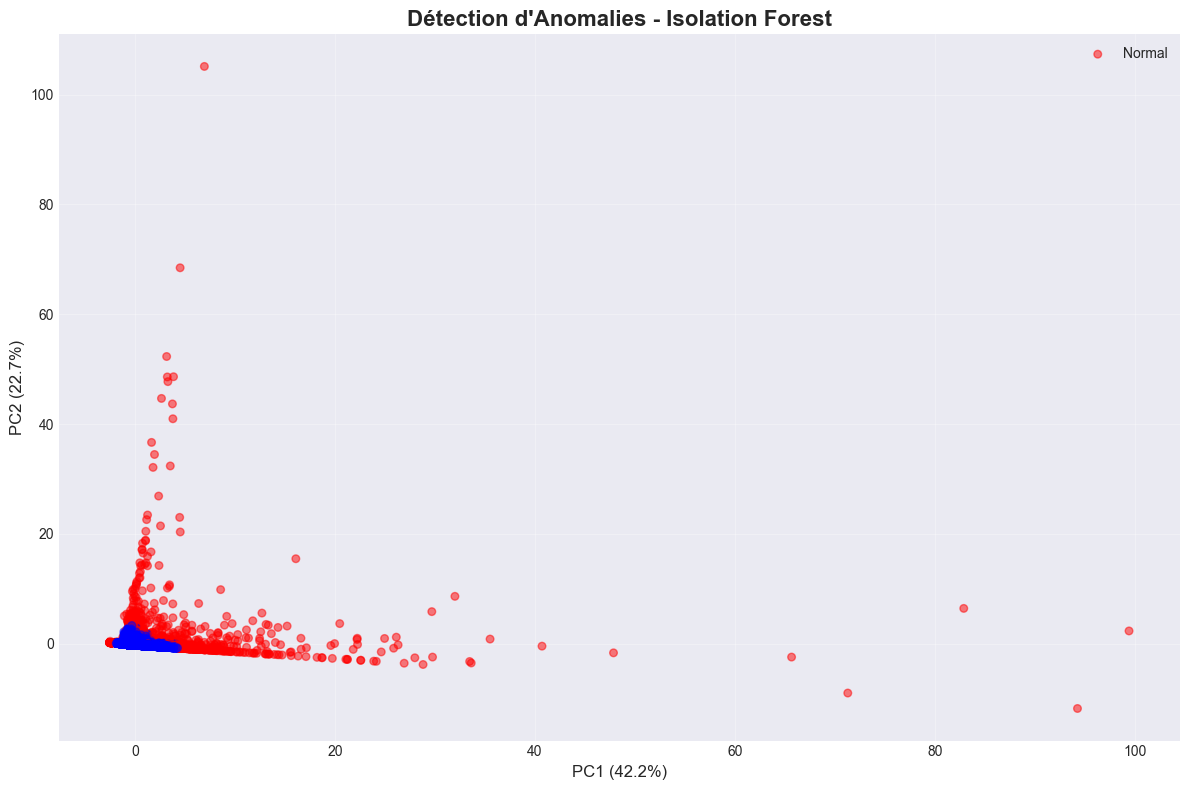

Variance expliquée : 64.91%


In [7]:
# Réduire à 2 dimensions avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer le graphique
plt.figure(figsize=(12, 8))
colors = ['blue' if x == 1 else 'red' for x in predictions]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5, s=30)

plt.title('Détection d\'Anomalies - Isolation Forest', fontsize=16, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.legend(['Normal', 'Anomalie'], loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variance expliquée : {pca.explained_variance_ratio_.sum()*100:.2f}%")

## 8. Distribution des Scores d'Anomalie

C:\Users\NITRO 5\AppData\Local\Temp\ipykernel_15268\1553713123.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([anomaly_scores[predictions == 1], anomaly_scores[predictions == -1]],


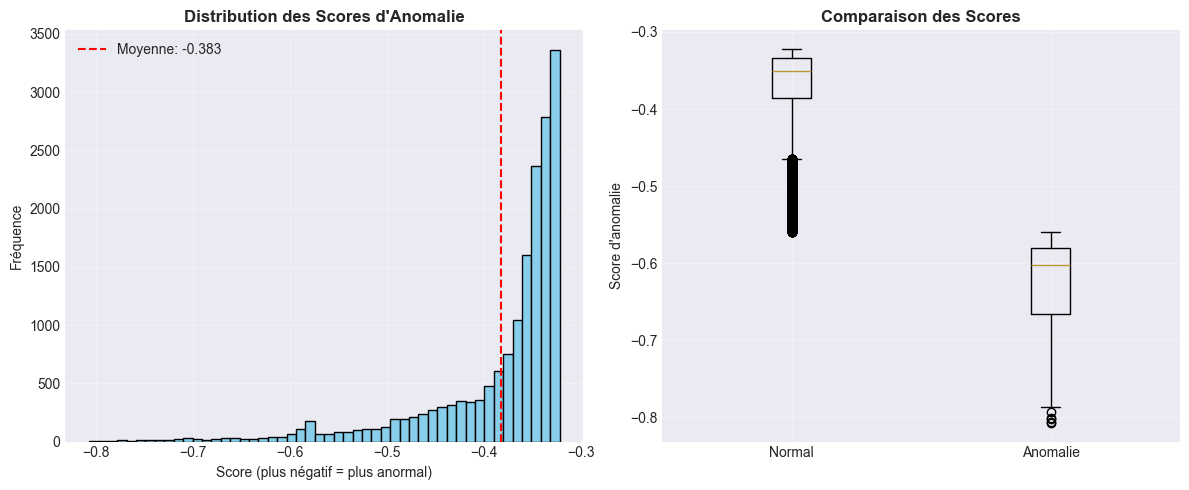

In [8]:
# Histogramme des scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black')
plt.axvline(anomaly_scores.mean(), color='red', linestyle='--', label=f'Moyenne: {anomaly_scores.mean():.3f}')
plt.title('Distribution des Scores d\'Anomalie', fontweight='bold')
plt.xlabel('Score (plus négatif = plus anormal)')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot([anomaly_scores[predictions == 1], anomaly_scores[predictions == -1]], 
            labels=['Normal', 'Anomalie'])
plt.title('Comparaison des Scores', fontweight='bold')
plt.ylabel('Score d\'anomalie')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Top 20 Entreprises Anormales

In [9]:
# Les 20 cas les plus anormaux
top_anomalies = df[df['est_anomalie'] == 1].nsmallest(20, 'score_anomalie')

print("="*80)
print("TOP 20 ENTREPRISES SUSPECTES")
print("="*80)

colonnes_affichage = [
    'directionRegionale', 'nb_salaries', 'salaire_moyen', 
    'masse_salariale_totale', 'taux_salaries_actifs', 
    'compte_a_risque', 'score_anomalie'
]

top_anomalies[colonnes_affichage]

TOP 20 ENTREPRISES SUSPECTES


,directionRegionale,nb_salaries,salaire_moyen,masse_salariale_totale,taux_salaries_actifs,compte_a_risque,score_anomalie
1458,12,6.0,373305.453333,2239832.72,100.0,1,-0.807509
1592,0,6.0,255534.276667,1533205.66,100.0,1,-0.806108
1750,14,5.0,239109.606000,1195548.03,100.0,1,-0.802842
3597,0,45.0,74440.911778,3349841.03,100.0,1,-0.801521
2940,0,3.0,177911.413333,533734.24,100.0,1,-0.793550
346,6,6.0,97445.428333,584672.57,100.0,1,-0.786601
2751,14,3.0,94098.950000,282296.85,100.0,1,-0.783944
3683,12,14.0,83447.842857,1168269.80,100.0,1,-0.777714
4713,14,3.0,111991.556667,335974.67,100.0,1,-0.777543
8,0,185.0,33165.766595,6135666.82,100.0,1,-0.776851


## 10. Analyse des Anomalies par Région


ANOMALIES PAR RÉGION :
                    Nb_Anomalies  Taux_Anomalie
directionRegionale                             
0                            251          0.093
14                           124          0.083
12                            95          0.050
6                             87          0.052
10                            55          0.027
16                            51          0.034
15                            43          0.032
4                             35          0.038
8                             30          0.047
13                            25          0.037
11                            20          0.030
7                             19          0.031
3                             16          0.042
1                              8          0.022
5                              2          0.035
9                              2          0.010
2                              0          0.000


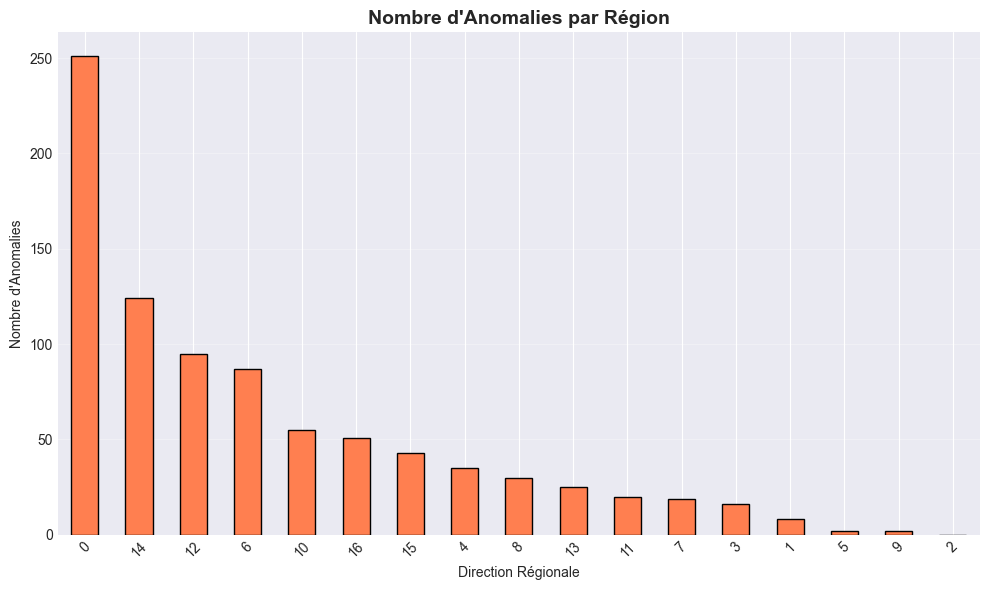

In [10]:
# Anomalies par région
anomalies_region = df.groupby('directionRegionale').agg({
    'est_anomalie': ['sum', 'mean']
}).round(3)

anomalies_region.columns = ['Nb_Anomalies', 'Taux_Anomalie']
anomalies_region = anomalies_region.sort_values('Nb_Anomalies', ascending=False)

print("\nANOMALIES PAR RÉGION :")
print(anomalies_region)

# Graphique
plt.figure(figsize=(10, 6))
anomalies_region['Nb_Anomalies'].plot(kind='bar', color='coral', edgecolor='black')
plt.title('Nombre d\'Anomalies par Région', fontsize=14, fontweight='bold')
plt.xlabel('Direction Régionale')
plt.ylabel('Nombre d\'Anomalies')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 11. Sauvegarde des Résultats

In [11]:
# Sauvegarder les résultats
df.to_csv('resultats_anomalies_detection.csv', index=False)

# Sauvegarder seulement les anomalies
anomalies_only = df[df['est_anomalie'] == 1].sort_values('score_anomalie')
anomalies_only.to_csv('entreprises_anormales.csv', index=False)

print(f"✓ Résultats sauvegardés")
print(f"  - resultats_anomalies_detection.csv ({len(df)} entreprises)")
print(f"  - entreprises_anormales.csv ({len(anomalies_only)} anomalies)")

✓ Résultats sauvegardés
  - resultats_anomalies_detection.csv (17259 entreprises)
  - entreprises_anormales.csv (863 anomalies)


## 📊 Résumé Final

In [12]:
print("="*80)
print("RAPPORT FINAL - DÉTECTION D'ANOMALIES")
print("="*80)
print(f"\n📁 Dataset : {len(df)} entreprises")
print(f"🔍 Features utilisées : {len(features_ml)}")
print(f"🤖 Modèle : Isolation Forest (100 arbres)")
print(f"📈 Contamination : 5%")
print(f"\n🚨 RÉSULTATS :")
print(f"   • Anomalies détectées : {(df['est_anomalie'] == 1).sum()} ({(df['est_anomalie'] == 1).sum()/len(df)*100:.2f}%)")
print(f"   • Entreprises normales : {(df['est_anomalie'] == 0).sum()} ({(df['est_anomalie'] == 0).sum()/len(df)*100:.2f}%)")
print(f"\n💡 CARACTÉRISTIQUES DES ANOMALIES :")
anomalies = df[df['est_anomalie'] == 1]
print(f"   • Salaire moyen anormal : {anomalies['salaire_moyen'].mean():.2f} €")
print(f"   • Comptes à risque : {anomalies['compte_a_risque'].sum()}")
print(f"   • Taux activité moyen : {anomalies['taux_salaries_actifs'].mean():.1f}%")
print(f"\n✅ Fichiers générés :")
print(f"   1. resultats_anomalies_detection.csv")
print(f"   2. entreprises_anormales.csv")
print("="*80)

RAPPORT FINAL - DÉTECTION D'ANOMALIES

📁 Dataset : 17259 entreprises
🔍 Features utilisées : 13
🤖 Modèle : Isolation Forest (100 arbres)
📈 Contamination : 5%

🚨 RÉSULTATS :
   • Anomalies détectées : 863 (5.00%)
   • Entreprises normales : 16396 (95.00%)

💡 CARACTÉRISTIQUES DES ANOMALIES :
   • Salaire moyen anormal : 19137.09 €
   • Comptes à risque : 859
   • Taux activité moyen : 74.0%

✅ Fichiers générés :
   1. resultats_anomalies_detection.csv
   2. entreprises_anormales.csv


# Sauvegarger model for streamlit

In [13]:
import pickle

# ========== 1. SAUVEGARDER LE MODÈLE ==========
with open('isolation_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("✓ isolation_forest_model.pkl")

# ========== 2. SAUVEGARDER LE SCALER ==========
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✓ scaler.pkl")

# ========== 3. SAUVEGARDER LA LISTE DES FEATURES ==========
with open('features_list.pkl', 'wb') as f:
    pickle.dump(features_ml, f)
print("✓ features_list.pkl")

# ========== 4. SAUVEGARDER LE PCA (OPTIONNEL) ==========
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)
print("✓ pca_model.pkl")

print("\n" + "="*80)
print("TOUS LES FICHIERS .pkl CRÉÉS AVEC SUCCÈS !")
print("="*80)
print("\nFichiers créés :")
print("  1. isolation_forest_model.pkl - Modèle Isolation Forest")
print("  2. scaler.pkl - StandardScaler pour normalisation")
print("  3. features_list.pkl - Liste des 13 features")
print("  4. pca_model.pkl - Modèle PCA pour visualisation")
print("\n💡 Utilisez ces fichiers dans Streamlit avec :")
print("   model = pickle.load(open('isolation_forest_model.pkl', 'rb'))")
print("="*80)

✓ isolation_forest_model.pkl
✓ scaler.pkl
✓ features_list.pkl
✓ pca_model.pkl

TOUS LES FICHIERS .pkl CRÉÉS AVEC SUCCÈS !

Fichiers créés :
  1. isolation_forest_model.pkl - Modèle Isolation Forest
  2. scaler.pkl - StandardScaler pour normalisation
  3. features_list.pkl - Liste des 13 features
  4. pca_model.pkl - Modèle PCA pour visualisation

💡 Utilisez ces fichiers dans Streamlit avec :
   model = pickle.load(open('isolation_forest_model.pkl', 'rb'))
